# Week 3
[Slide](../Slides_etc/Presentation%20C%20ANST%202025.pdf)\
[R code](../Slides_etc/Lecture_C.ipynb)

---

## Exercise 7.1

<img src="SymPyBilleder/2025-09-15-09-14-17.png" width="550">

--- 

Keywords: Principal Component Analysis,  make a scatter plot,  calculate the correlation
coefficients, relationship between the plots and the correlation
coefficients, score plots, PCA function or the princomp function, how many principal components should you use, variables are explained by the two ﬁrst principal components, relation to the correlation matrix.

---

### 1. Read the data into R, make a scatter plot of the data, and calculate the correlation coefficients. What relationship do you see between the plots and the correlation coefficients?

In [1]:
olympic <- read.csv2("../Data/heptathlon.csv")
head(olympic)

,Name,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,"Schulz,(GDR)",6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


We need to remove Name first, because it is not an integer. 

In [2]:
olympic$Name <- NULL
head(olympic)

,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


Now we can make the scatterplot

Indlaeser kraevet pakke: carData

Warning message:
"pakke 'carData' blev bygget under R version 4.5.1"


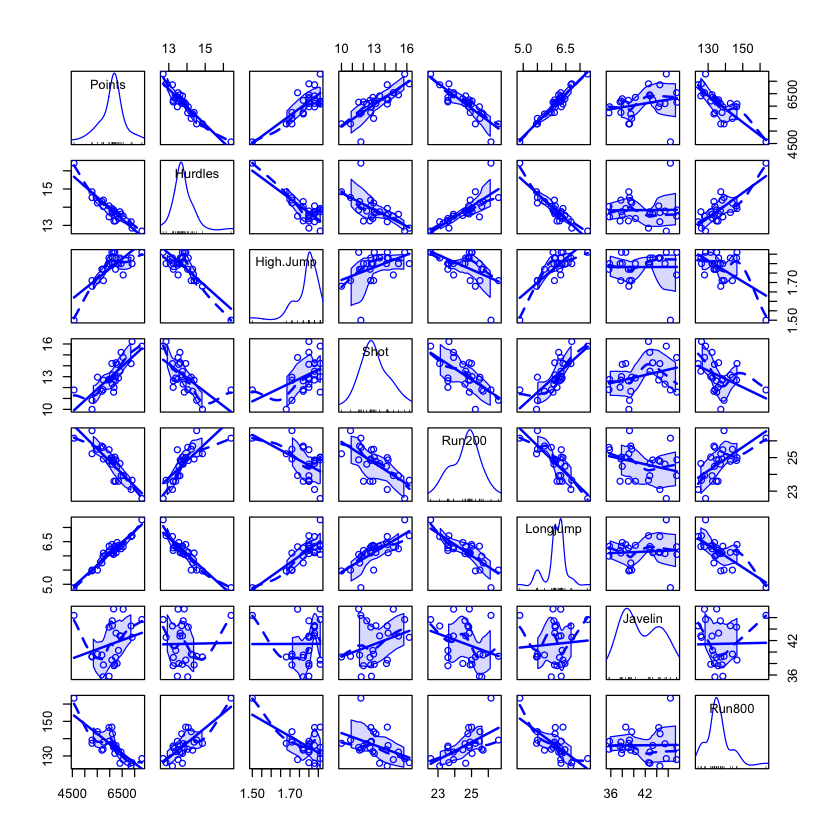

In [3]:
library(car)
scatterplotMatrix(olympic)

Now we need to calculate the correlation coefficient. 

In [4]:
cor(olympic)

,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
Points,1.0000000,-0.92441444,0.771244026,0.7819772,-0.8623581,0.95477022,0.248199746,-0.7740862
Hurdles,-0.9244144,1.00000000,-0.811402536,-0.6252580,0.7737205,-0.90321261,0.013541686,0.7691130
High.Jump,0.7712440,-0.81140254,1.000000000,0.4307521,-0.4876637,0.78222009,0.002874155,-0.5897750
Shot,0.7819772,-0.62525804,0.430752096,1.0000000,-0.6496633,0.73889970,0.298746305,-0.4179724
Run200,-0.8623581,0.77372054,-0.487663685,-0.6496633,1.0000000,-0.80345072,-0.288366078,0.6015774
Longjump,0.9547702,-0.90321261,0.782220090,0.7388997,-0.8034507,1.00000000,0.067205976,-0.6969807
Javelin,0.2481997,0.01354169,0.002874155,0.2987463,-0.2883661,0.06720598,1.000000000,0.0158585
Run800,-0.7740862,0.76911298,-0.589774958,-0.4179724,0.6015774,-0.69698069,0.015858499,1.0000000


Plot the relationship between the scatterplot and the correlation coefficient. 

In [5]:
# Calculate correlation matrix
corr_matrix <- cor(olympic)

# Function to classify relationship
relation <- function(r) {
  if (r > 0.7) {
    return("Strong Positive")
  } else if (r > 0.3) {
    return("Moderate Positive")
  } else if (r > 0) {
    return("Weak Positive")
  } else if (r < -0.7) {
    return("Strong Negative")
  } else if (r < -0.3) {
    return("Moderate Negative")
  } else if (r < 0) {
    return("Weak Negative")
  } else {
    return("No Relationship")
  }
}

# Apply classification
relation_matrix <- apply(corr_matrix, c(1,2), relation)

print(relation_matrix)

          Points            Hurdles             High.Jump          
Points    "Strong Positive" "Strong Negative"   "Strong Positive"  
Hurdles   "Strong Negative" "Strong Positive"   "Strong Negative"  
High.Jump "Strong Positive" "Strong Negative"   "Strong Positive"  
Shot      "Strong Positive" "Moderate Negative" "Moderate Positive"
Run200    "Strong Negative" "Strong Positive"   "Moderate Negative"
Longjump  "Strong Positive" "Strong Negative"   "Strong Positive"  
Javelin   "Weak Positive"   "Weak Positive"     "Weak Positive"    
Run800    "Strong Negative" "Strong Positive"   "Moderate Negative"
          Shot                Run200              Longjump           
Points    "Strong Positive"   "Strong Negative"   "Strong Positive"  
Hurdles   "Moderate Negative" "Strong Positive"   "Strong Negative"  
High.Jump "Moderate Positive" "Moderate Negative" "Strong Positive"  
Shot      "Strong Positive"   "Moderate Negative" "Strong Positive"  
Run200    "Moderate Negative" "Strong 

The relationship between the plots and the correlation coefficients, is that we can see the distibution between the correlation and we can see if they are strong, weak or moderate correlated. The coefficient just tells in numbers what we see in the scatterplot. 

The scatterplots show the shape and direction of the relationship between variables: a narrow upward slope means strong positive correlation, a downward slope means negative correlation, and a cloud of points means weak or no correlation. The correlation coefficient gives the same information as a single number between -1 and 1. Large values (close to ±1) confirm what we visually see as strong relationships, while values near 0 indicate weak or no relationship.

### 2. Run a principal component analysis (PCA) on the variables, excluding the number of points obtained, and make the score plots. You can use the PCA function or the princomp function. How many principal components should you use?

First we excluding the number of points obtained.

In [6]:
olympic_filtered <- olympic[2:8]

In [ ]:
olympic_filtered.PCA <- princomp(olympic_filtered, cor = TRUE)

# Summary of explained variance
summary(olympic_filtered.PCA)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.1016647 1.0936291 0.71415925 0.67721249 0.53812115
Proportion of Variance 0.6309992 0.1708607 0.07286049 0.06551668 0.04136777
Cumulative Proportion  0.6309992 0.8018599 0.87472034 0.94023702 0.98160479
                           Comp.6     Comp.7
Standard deviation     0.28111344 0.22302852
Proportion of Variance 0.01128925 0.00710596
Cumulative Proportion  0.99289404 1.00000000

Now we make the scoreplot

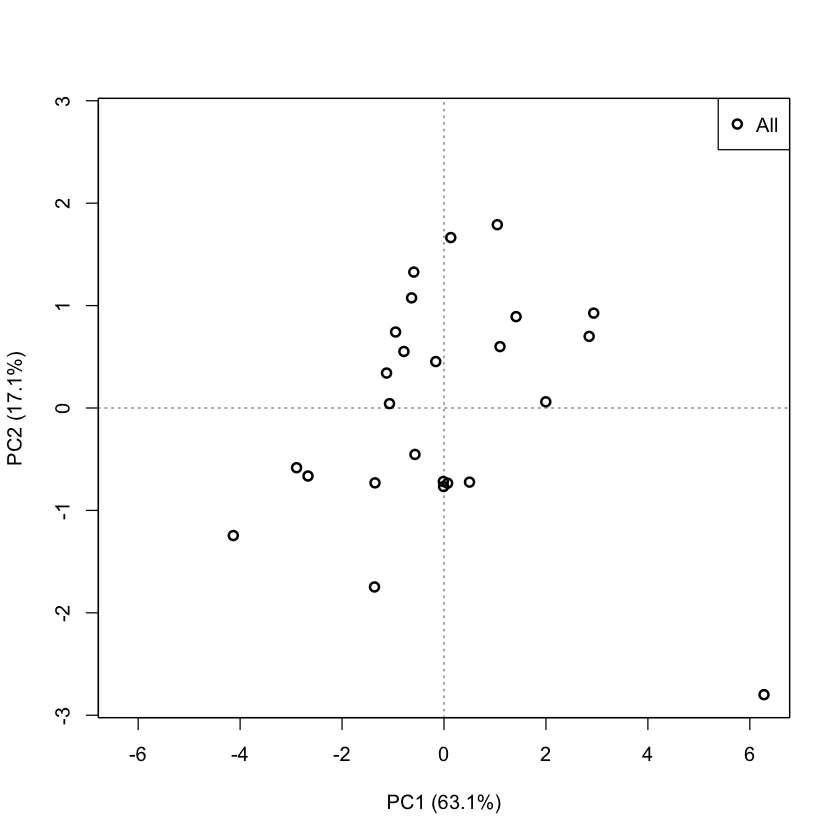

In [14]:
## 1) PCA (scale because units differ)
olympic_pca <- prcomp(olympic_filtered, scale. = TRUE)

## 2) A score-plot function that mimics chemometrics::scoreplot
scoreplot_like <- function(olympic_pca, group, pcs = c(1,2), lwd = 2, main = NULL) {
  stopifnot(inherits(pca, "prcomp"))
  sc <- as.data.frame(pca$x)
  if (missing(group)) group <- factor(rep("All", nrow(sc)))
  group <- factor(group)  # ensure factor

  pcx <- paste0("PC", pcs[1]); pcy <- paste0("PC", pcs[2])
  vx  <- round(100 * summary(pca)$importance[2, pcs[1]], 1)
  vy  <- round(100 * summary(pca)$importance[2, pcs[2]], 1)

  # symmetric limits like scoreplot does
  limx <- max(abs(sc[[pcx]])); limy <- max(abs(sc[[pcy]]))
  limx <- c(-limx, limx); limy <- c(-limy, limy)

  # empty frame, then add zero lines and points
  plot(sc[[pcx]], sc[[pcy]], type = "n",
       xlab = paste0(pcx, " (", vx, "%)"),
       ylab = paste0(pcy, " (", vy, "%)"),
       xlim = limx, ylim = limy, main = main)
  abline(h = 0, v = 0, lty = 3, col = "grey50")
  points(sc[[pcx]], sc[[pcy]],
         col = as.numeric(group),
         pch = as.numeric(group),
         lwd = lwd)
  legend("topright", legend = levels(group),
         col = 1:nlevels(group),
         pch = 1:nlevels(group),
         pt.lwd = lwd, bty = "o")
  box()
}

## 3) Call it on olympic_filtered
## Replace `group_var` with your factor (country, athlete group, etc.)
## If you have no groups, omit the second argument.

# Example with no groups:
scoreplot_like(olympic_pca)

**How many PCA should we use?**

We can use the elbow plot

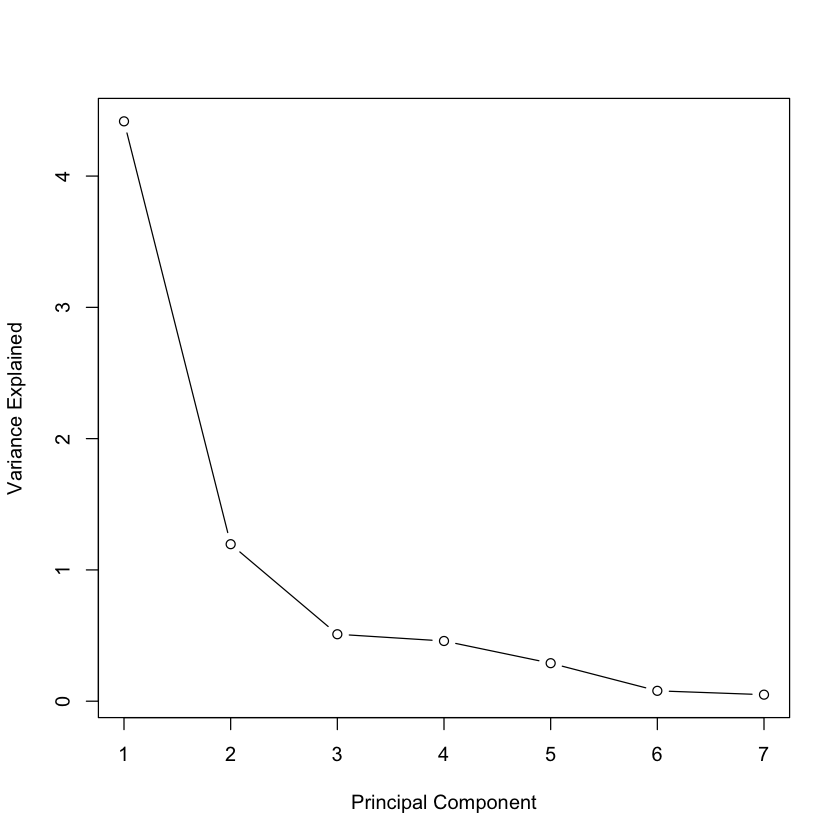

In [18]:
plot(1:7, olympic_pca$sdev^2, type = "b", xlab = "Principal Component", ylab = "Variance Explained")

From the elbow plot, we can see that we should use 3 PCA. We can se it from where the elbow drops. 

We can also use the code below

In [19]:
eig        <- olympic_pca$sdev^2
prop_var   <- eig / sum(eig)
cum_var    <- cumsum(prop_var)

kaiser_k   <- sum(eig > 1)                 # eigenvalues > 1
target_var <- 0.90                         # pick your bar: 0.80–0.95 is common
thr_k      <- which(cum_var >= target_var)[1]

# Final call: smallest k that reaches target variance; if Kaiser is larger, take that.
k_use      <- max(thr_k, kaiser_k)

cat("Eigenvalues:\n");           print(round(eig, 3))
cat("\nProportion of variance:\n"); print(round(prop_var, 3))
cat("\nCumulative variance:\n");   print(round(cum_var, 3))
cat(sprintf("\nKaiser PCs (>1): %d | PCs for %.0f%% variance: %d | ==> Use k = %d\n",
            kaiser_k, target_var*100, thr_k, k_use))

Eigenvalues:
[1] 4.417 1.196 0.510 0.459 0.290 0.079 0.050

Proportion of variance:
[1] 0.631 0.171 0.073 0.066 0.041 0.011 0.007

Cumulative variance:
[1] 0.631 0.802 0.875 0.940 0.982 0.993 1.000

Kaiser PCs (>1): 2 | PCs for 90% variance: 4 | ==> Use k = 4


We can see that we want to keep 4 PCA, because the target variance should be over 90%. 

The first principal component explains 63% of the variance, and the first two together explain 80%. Adding the third component raises this to about 88%, which passes the common 85% threshold. According to the Kaiser rule (eigenvalues > 1), two PCs should be kept, but based on explained variance it is more appropriate to retain three principal components.

### 3. Which variables are explained by the two ﬁrst principal components? What is the relation to the correlation matrix?

A loading plot shows which variables contribute most to each principal component. Large loadings mean a variable is well represented by that PC. It helps us interpret what the components actually measure and shows how correlated variables group together in the reduced PCA space.

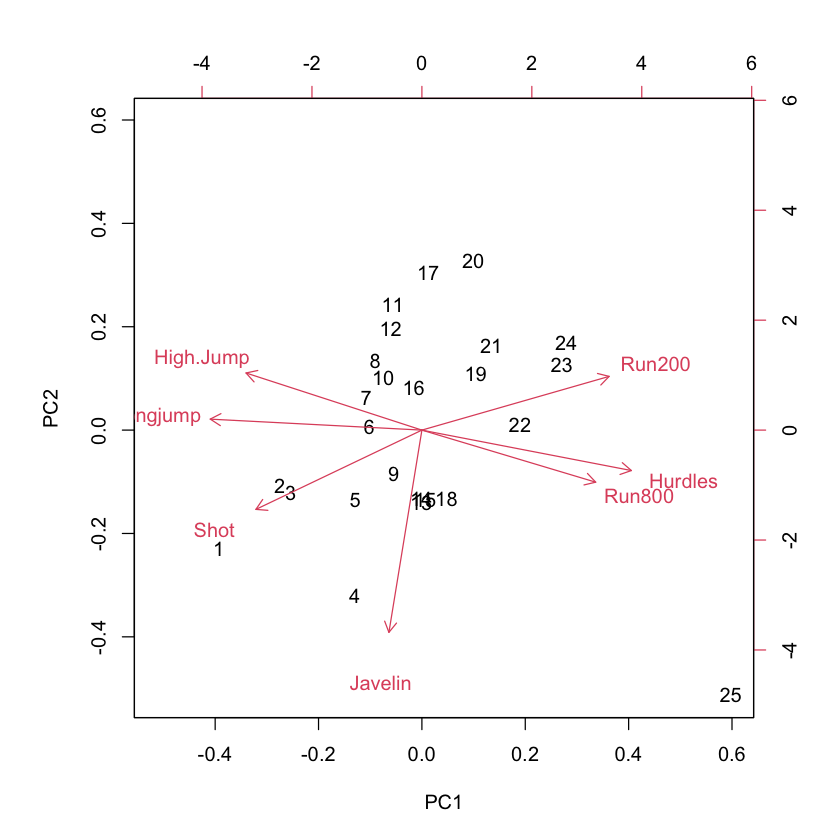

In [16]:
biplot(olympic_pca)

If we look at the PC1, we can see that javelin is very close to the centrum (or zero). So PC1 do not explain javelin very much. 

If we look at PC2, we can see that all (Longjump, High Jump, Shot, Run200, Run800 and Hurdles), except javelin, is close to centrum/zero. So PC2 explan javelin very good, but not the other.


The first two principal components mainly explain the variation in events that are strongly correlated, such as Longjump, High Jump, Shot, and Hurdles. These load with high absolute values on PC1, making it a general measure of overall performance. PC2 captures contrasts between groups of events, such as running versus throwing/jumping. This matches the correlation matrix: strongly correlated events cluster together in the same component, while weakly correlated events (like Javelin) contribute less or appear in later components.

## Exercise 7.2

<img src="SymPyBilleder/2025-09-15-09-15-37.png" width="550">

---

Keywords: Principal Component Analysis, Analysis on all variables, analyze the correlation- or the variance-covariance matrix, eigenvalues and related plots, how many components should we use, compare the partial correlations with correlations, compare the eigenvalues and
vectors, partial correlations, test statistic.

---

We start by loading the data

In [24]:
fitness <- read.table("../Data/Fitness.txt", header = TRUE)
head(fitness)

,Age,Weight,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,44,89.47,44.609,11.37,62,178,182
2,40,75.07,45.313,10.07,62,185,185
3,44,85.84,54.297,8.65,45,156,168
4,42,68.15,59.571,8.17,40,166,172
5,38,89.02,49.874,9.22,55,178,180
6,47,77.45,44.811,11.63,58,176,176


### A. Analysis on all variables

#### 1. In a principal component analysis, should we analyze the correlation- or the variance- covariance matrix? Why?

We need to analyze the correlation- or the variance-covariance matrix to avoid scalling problems. 

We usually analyze the **correlation matrix** in PCA when variables are measured on different scales (e.g. seconds, meters, points). This standardizes the data so no variable dominates just because of larger units or variance. The **covariance matrix** is only suitable if all variables are already on the same scale.


It depends on the context of how the PCA is applied. If the PCA is applied to scaled data, it is correlation-based PCA meaning we should use the correlation matrxix. If no scaling is applied the PCA is covariance-based and we should use the covariance matrix.

#### 2. Look at the eigenvalues and related plots (i.e. scree- and variance explained plots). How many components should we use?

Before we can look at the eigenvalues, we need to run all the PCA. 

In [28]:
fitness.PCA <- princomp(fitness, cor = TRUE)

# Summary of explained variance
summary(fitness.PCA)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.7037053 1.3518873 0.9729386 0.8741719 0.62210524
Proportion of Variance 0.4146588 0.2610856 0.1352299 0.1091681 0.05528785
Cumulative Proportion  0.4146588 0.6757444 0.8109743 0.9201424 0.97543026
                           Comp.6      Comp.7
Standard deviation     0.36257885 0.201307664
Proportion of Variance 0.01878049 0.005789254
Cumulative Proportion  0.99421075 1.000000000

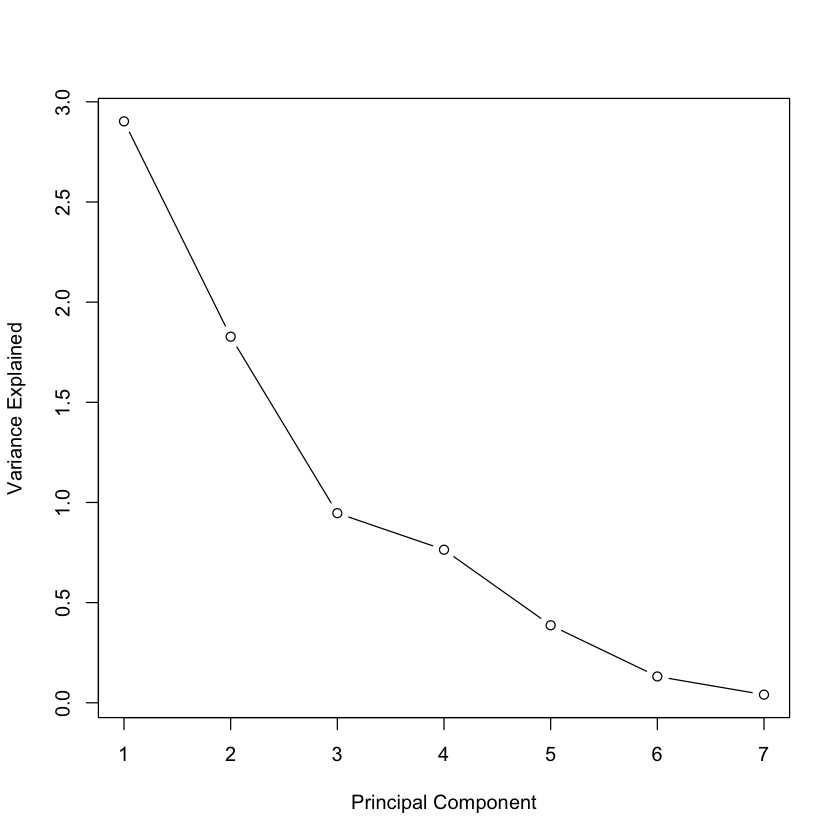

In [29]:
plot(1:7, fitness.PCA$sdev^2, type = "b", xlab = "Principal Component", ylab = "Variance Explained")

In [31]:
eig        <- fitness.PCA$sdev^2
prop_var   <- eig / sum(eig)
cum_var    <- cumsum(prop_var)

kaiser_k   <- sum(eig > 1)                 # eigenvalues > 1
target_var <- 0.85                        # pick your bar: 0.80–0.95 is common
thr_k      <- which(cum_var >= target_var)[1]

# Final call: smallest k that reaches target variance; if Kaiser is larger, take that.
k_use      <- max(thr_k, kaiser_k)

cat("Eigenvalues:\n");           print(round(eig, 3))
cat("\nProportion of variance:\n"); print(round(prop_var, 3))
cat("\nCumulative variance:\n");   print(round(cum_var, 3))
cat(sprintf("\nKaiser PCs (>1): %d | PCs for %.0f%% variance: %d | ==> Use k = %d\n",
            kaiser_k, target_var*100, thr_k, k_use))

Eigenvalues:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 
 2.903  1.828  0.947  0.764  0.387  0.131  0.041 



Proportion of variance:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 
 0.415  0.261  0.135  0.109  0.055  0.019  0.006 

Cumulative variance:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 
 0.415  0.676  0.811  0.920  0.975  0.994  1.000 

Kaiser PCs (>1): 2 | PCs for 85% variance: 4 | ==> Use k = 4


We can see that we should use 4 PCA 

* **Eigenvalues**:

  * PC1 = 2.903 and PC2 = 1.828 are > 1 → Kaiser criterion suggests **2 components**.
  * PC3 = 0.947 and lower are < 1 → they would be discarded under Kaiser.

* **Proportion of variance**:

  * PC1 explains 41.5%, PC2 adds 26.1% → together 67.6%.
  * PC3 takes you to 81.1%, PC4 to 92.0%.

* **Cumulative variance**:

  * To reach at least 85%, you need the first **4 components**.

* **Decision**:

  * By Kaiser → 2 PCs.
  * By variance threshold (≥85%) → 4 PCs.
  * Since your rule combines them (`max(thr_k, kaiser_k)`), the answer is **use 4 principal components**.

You can summarize it in one line:

“The Kaiser rule suggests 2 PCs, but to explain at least 85% of the variance we need 4 PCs. Therefore, we should use **4 principal components**.”

Do you want me to also show you how to make the **scree plot** and **cumulative variance plot** so you can visually justify keeping 4 PCs?


### B. Exlude Age and Weight

#### 3. And then repeat the above analyses.

In [34]:
fit_new <- read.table("../data/Fitness.txt", header = TRUE)
fit_new$Age <- NULL
fit_new$Weight <- NULL

head(fit_new)

,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
,<dbl>,<dbl>,<int>,<int>,<int>
1,44.609,11.37,62,178,182
2,45.313,10.07,62,185,185
3,54.297,8.65,45,156,168
4,59.571,8.17,40,166,172
5,49.874,9.22,55,178,180
6,44.811,11.63,58,176,176


In [40]:
fit_new.PCA <- princomp(fit_new, cor = TRUE)

# Summary of explained variance
summary(fit_new.PCA)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4      Comp.5
Standard deviation     1.6740267 1.1540801 0.8196417 0.3863334 0.211347064
Proportion of Variance 0.5604731 0.2663802 0.1343625 0.0298507 0.008933516
Cumulative Proportion  0.5604731 0.8268533 0.9612158 0.9910665 1.000000000

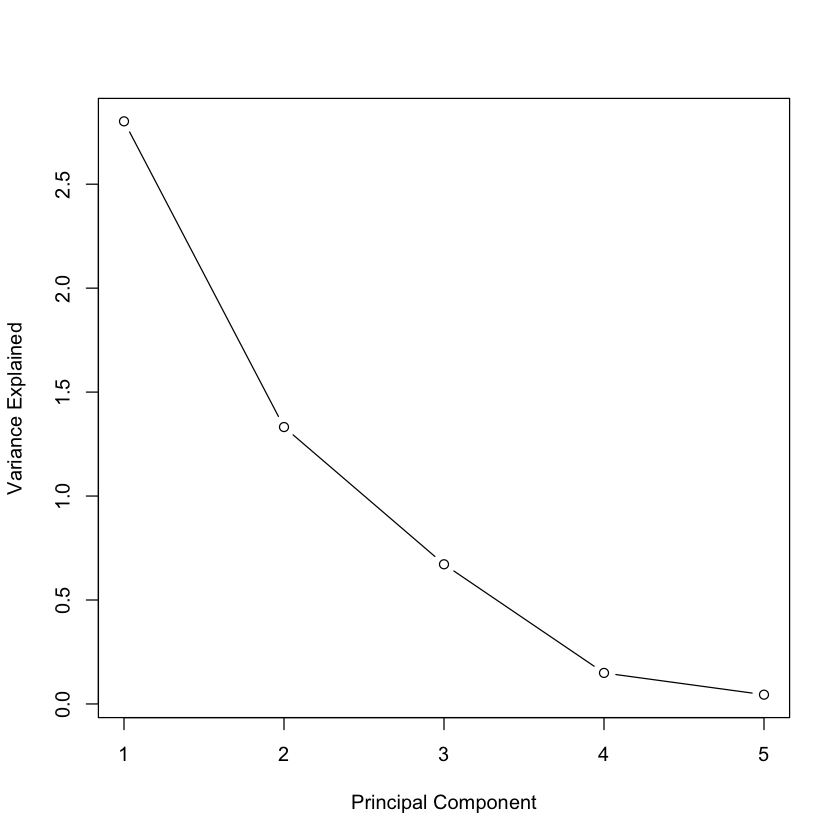

In [42]:
plot(1:5, fit_new.PCA$sdev^2, type = "b", xlab = "Principal Component", ylab = "Variance Explained")

In [43]:
eig        <- fit_new.PCA$sdev^2
prop_var   <- eig / sum(eig)
cum_var    <- cumsum(prop_var)

kaiser_k   <- sum(eig > 1)                 # eigenvalues > 1
target_var <- 0.85                        # pick your bar: 0.80–0.95 is common
thr_k      <- which(cum_var >= target_var)[1]

# Final call: smallest k that reaches target variance; if Kaiser is larger, take that.
k_use      <- max(thr_k, kaiser_k)

cat("Eigenvalues:\n");           print(round(eig, 3))
cat("\nProportion of variance:\n"); print(round(prop_var, 3))
cat("\nCumulative variance:\n");   print(round(cum_var, 3))
cat(sprintf("\nKaiser PCs (>1): %d | PCs for %.0f%% variance: %d | ==> Use k = %d\n",
            kaiser_k, target_var*100, thr_k, k_use))

Eigenvalues:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 
 2.802  1.332  0.672  0.149  0.045 

Proportion of variance:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 
 0.560  0.266  0.134  0.030  0.009 

Cumulative variance:
Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 
 0.560  0.827  0.961  0.991  1.000 

Kaiser PCs (>1): 2 | PCs for 85% variance: 3 | ==> Use k = 3


Now we want to use 3 PCA

### C. Condition on Age and Weight

#### 4. Compare the partial correlations with correlations in B. Compare the eigenvalues and vectors with those from the results in B!

#### 5. Are there big differences? If not: what can we then say about Age and Weight?

### D. Partial correlations based on Weight (by hand!)

#### 6. Reproduce some of the partial correlations, the test statistic for assessing whether the true partial correlations are zero and ﬁnd the associated p-values!

## Exercise 7.3

<img src="SymPyBilleder/2025-09-15-09-17-50.png" width="550">\
<img src="SymPyBilleder/2025-09-15-09-18-07.png" width="550">

---

Keywords: Principal Component Analysis, variation in the data, parameters dominate,  correlation matrix, suggestion/strategy for exclusion of variables.

---

### 1. How much variation in the data does the ﬁrst four PCs explain?

### 2. Look at the principle components. What kind of parameters dominate the ﬁrst two PCs?

### 3. In what way can this be related to the correlation matrix?

### 4. It may be expensive to measure all these variables. If some of them are redundant, we might want to exclude some of them from future studies. Give a suggestion/strategy for exclusion of variables.


## Exercise 7.4 

<img src="SymPyBilleder/2025-09-15-09-19-19.png" width="550">

---

Keywords: correlations between outcomes, 3 possibilities, measure the degree of dishonesty, linear combination of the possibilities, largest possible fraction of the total
variation, verbal interpretation of the linear combination.

---

### 1. Find the linear combination of the possibilities which describes the largest possible fraction of the total variation and give the fraction.

### 2. Give a verbal interpretation of the linear combination.